In [1]:
import tensorflow as tf
import data_util
import cv2
import matplotlib.pyplot as plt
import resnet_V2
from tensorflow.keras.utils import plot_model
from tensorflow import keras

In [2]:
ds = data_util.get_cu_dataset(train_type='landmark')
ds_size = len(list(ds))
ds_size

239

In [3]:
train_size = int(0.7 * ds_size)
val_size = int(0.15 * ds_size)
test_size = int(0.15 * ds_size)

train_ds = ds.take(train_size)
test_ds = ds.skip(train_size)
val_ds = test_ds.skip(val_size)
test_ds = test_ds.take(test_size)

In [4]:
len(list(test_ds))

35

In [9]:
en = resnet_V2.ResNetEncoder()
resnet = keras.models.Sequential()
resnet.add(keras.layers.Input(shape=(256, 256, 3)))
resnet.add(en)
resnet.add(keras.layers.Flatten())
resnet.add(keras.layers.Dense(16))

In [10]:
resnet.load_weights('./trained_ckpt/regression')

In [12]:
for i in test_ds.take(1):
    sample = i

In [14]:
sample = sample[0]
sample.shape

TensorShape([32, 256, 256, 3])

In [16]:
infer = resnet(sample)
infer.shape

TensorShape([32, 16])

In [20]:
import matplotlib.pyplot as plt
import cv2

In [37]:
test_image = sample[2].numpy()
test_infer = infer[2] * 256.
test_infer = test_infer.numpy().reshape(-1, 2)

(-0.5, 255.5, 255.5, -0.5)

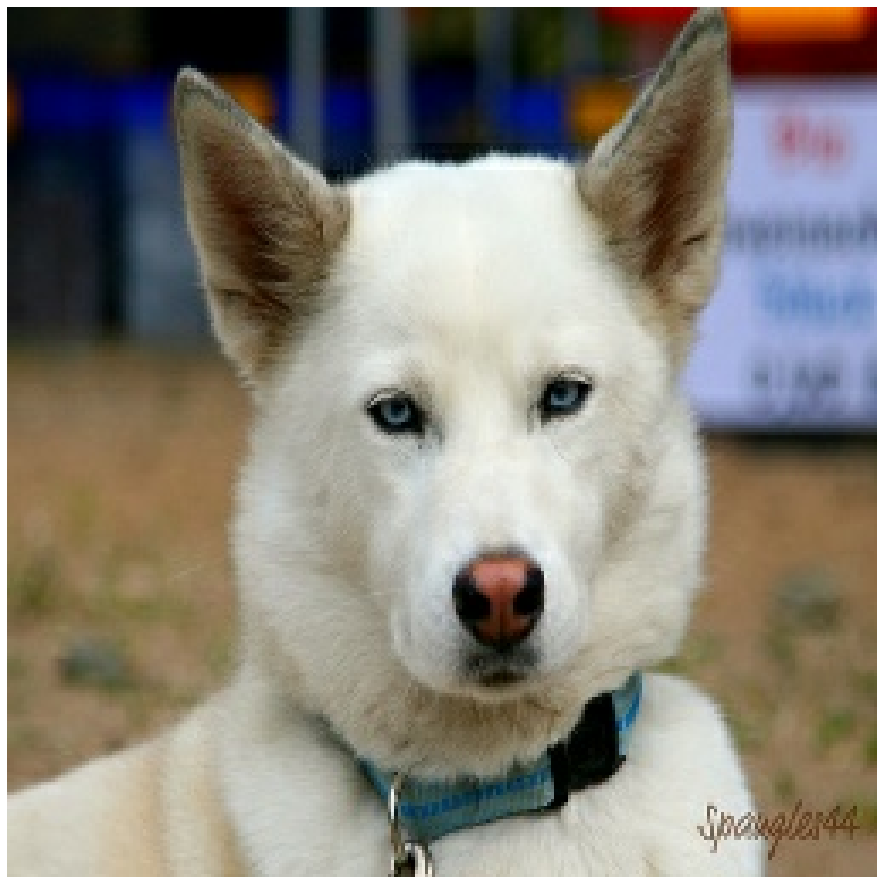

In [38]:
plt.figure(figsize=(16, 16))
plt.imshow(test_image)
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[125, 34]
[144, 44]
[160, 69]
[134, 70]
[116, 119]
[98, 38]
[81, 73]
[107, 76]


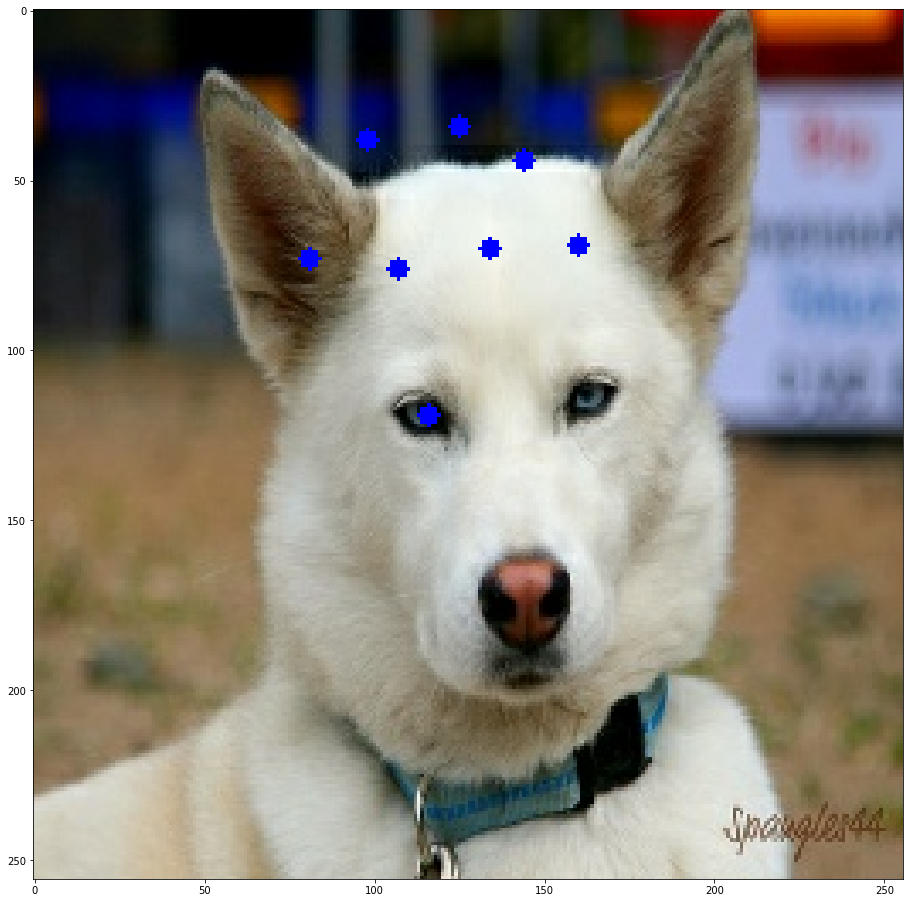

In [39]:
for i in test_infer:
    # point는 정수로
    center = [int(i[0]), int(i[1])]
    print(center)
    cv2.circle(test_image, center=tuple(center), radius=3, color=(0,0,255), thickness=-1, lineType=cv2.LINE_AA)

plt.figure(figsize=(16, 16))
plt.imshow(test_image)

In [40]:
test_image.shape

(256, 256, 3)